In [1]:
import numpy as np
import networkx as nx
from grakel import GraphKernel
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [52]:
from torch_geometric.datasets import TUDataset
tu_data = TUDataset(root="tutorial1",name= "Yeast")
# https://pytorch-geometrimport networkx as nx
t1 = tu_data[1]
len(t1)

4

In [53]:
G1 = to_networkx(t1, node_attrs=["x"], edge_attrs=["edge_attr"])

In [54]:
G1.size()

108

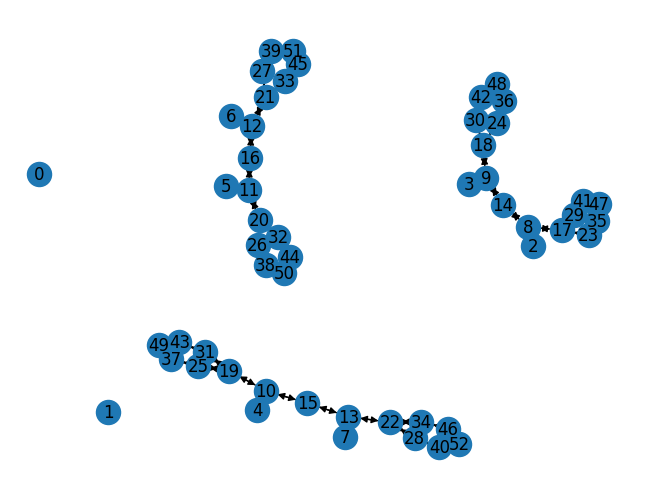

In [55]:
nx.draw(G1, with_labels = True)
plt.show()

In [56]:
UG1 = G1.to_undirected()

In [57]:

connected_components = nx.connected_components(UG1)

In [58]:
largest_connected_component_nodes = max(connected_components, key=len)

In [59]:
 SG1 = G1.subgraph(largest_connected_component_nodes)

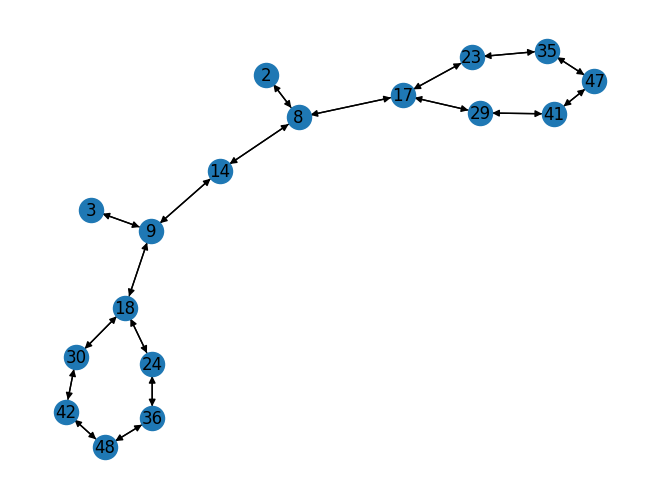

In [60]:
nx.draw(SG1, with_labels = True)
plt.show()

In [61]:
import networkx as nx

def radius_of_graph(G):
  
  if not nx.is_connected(G):
    raise nx.NetworkXError("Radius is not defined for disconnected graphs.")
  
  eccentricities = nx.eccentricity(G)
  radius = min(eccentricities.values())
  return radius

undirected_G = SG1.to_undirected()
radius = radius_of_graph(undirected_G)
print(f"The radius of the graph is: {radius}")


The radius of the graph is: 5
